<a href="https://colab.research.google.com/github/AI-CAPSTONE-PROJECT-GROUP-H/FAW-Detection-Project/blob/main/FAW_Detection_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODEL CREATION

**MOUNT GOOGLE DRIVE FOR PERSISTENT STORAGE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORT DATASET FROM ROBOFLOW**

In [ ]:
!pip install roboflow
from roboflow import Roboflow

rf = Roboflow(api_key="EzUMFX44gRIQrdCXeUOF")
project = rf.workspace("fall-armyworm").project("fall-armyworm")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 120.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fall-armyworm-1 in yolov8:: 100%|██████████| 19680/19680 [00:02<00:00, 6649.72it/s]


**CONFIRM DATASET DOWNLOADED SUCCESSFULLY**

In [ ]:
import os

dataset_path = dataset.location
print("Dataset root:", dataset_path)

print("Train folders:", os.listdir(os.path.join(dataset_path, "train")))
print("Valid folders:", os.listdir(os.path.join(dataset_path, "valid")))
print("Test folders:", os.listdir(os.path.join(dataset_path, "test")))


Dataset root: /content/fall-armyworm-1
Train folders: ['labels', 'images']
Valid folders: ['labels', 'images']
Test folders: ['labels', 'images']


**VERIFY DATASET STRUCTURE**

In [ ]:
import os
import yaml

# Check structure
dataset_path = dataset.location
print("📁 Dataset structure:")
for split in ["train", "valid", "test"]:
    images_dir = os.path.join(dataset_path, split, "images")
    if os.path.exists(images_dir):
        num_images = len([f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))])
        print(f"  {split}: {num_images} images")

# Load class names
with open(os.path.join(dataset_path, "data.yaml"), 'r') as f:
    data_config = yaml.safe_load(f)
    print(f"\n🏷️ Classes: {data_config['names']}")

📁 Dataset structure:
  train: 7317 images
  valid: 1246 images
  test: 1271 images

🏷️ Classes: ['fall-armyworm-egg', 'fall-armyworm-frass', 'fall-armyworm-larva', 'fall-armyworm-larval-damage', 'healthy-maize', 'maize-streak-disease']


In [ ]:
import torch

print("🔍 GPU Check:")
print(f"  CUDA Available: {torch.cuda.is_available()}")
print(f"  CUDA Device Count: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"  Current Device: {torch.cuda.current_device()}")
    print(f"  Device Name: {torch.cuda.get_device_name(0)}")
    print(f"  Device Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("  ❌ GPU NOT AVAILABLE!")
    print("  Go to: Runtime → Change runtime type → T4 GPU")

🔍 GPU Check:
  CUDA Available: True
  CUDA Device Count: 1
  Current Device: 0
  Device Name: Tesla T4
  Device Memory: 15.83 GB


**TRAIN YOLOV8 OBJECT DETECTION MODEL**

In [ ]:
import os
!pip install ultralytics
from ultralytics import YOLO

# Initialize model
model = YOLO('yolov8n.pt')

# Setup checkpoint directory in Google Drive
checkpoint_dir = '/content/drive/MyDrive/faw_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Train with automatic checkpointing
results = model.train(
    data=os.path.join(dataset_path, 'data.yaml'),
    epochs=25,
    imgsz=416,
    batch=32,
    name='faw_detection',
    project=checkpoint_dir,
    patience=5,
    save=True,
    save_period=10,
    device=0,
    cache=True,
    workers=2,
    # Minimal augmentation for speed
    degrees=0,
    translate=0,
    scale=0,
    flipud=0,
    fliplr=0.5,
    mosaic=0,
    # Training optimizations
    amp=True,           # Automatic Mixed Precision
    close_mosaic=0,
    # Faster optimizer settings
    optimizer='SGD',
    lr0=0.01,
    momentum=0.937
)

print("✅ Training completed!")

# Show training time
import datetime
print(f"⏱️ Total training time: {results.results_dict.get('train/time', 'N/A')}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=0, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fall-armyworm-1/data.yaml, degrees=0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0, format=torchscript, fraction=1.0, freeze=None, half=False, 

**EVALUATE MODEL PERFORMANCE**

In [ ]:
# Validate on test set
metrics = model.val(data=os.path.join(dataset_path, 'data.yaml'))

print("\n📊 Evaluation Metrics:")
print(f"  mAP50: {metrics.box.map50:.4f}")
print(f"  mAP50-95: {metrics.box.map:.4f}")
print(f"  Precision: {metrics.box.mp:.4f}")
print(f"  Recall: {metrics.box.mr:.4f}")

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1646.2±537.6 MB/s, size: 62.1 KB)
val: Scanning /content/fall-armyworm-1/valid/labels.cache... 1246 images, 38 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1246/1246 2.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 78/78 7.3it/s 10.7s
                   all       1246       2034      0.491      0.675      0.625      0.558
     fall-armyworm-egg         51         85     0.0312     0.0706     0.0272     0.0239
   fall-armyworm-frass        452        469      0.472      0.942      0.732      0.658
   fall-armyworm-larva        192        192      0.208      0.984      0.687      0.595
fall-armyworm-larval-damage        714        824      0.663      0.841       0.78      0.697
         healthy-maize        43

**VISUALIZE PREDICTIONS**

🖼️ Sample Predictions:

image 1/1 /content/fall-armyworm-1/test/images/C6320B9A-05E9-4368-A275-4D7861B0F533-20_14_50_jpeg_jpg.rf.c3c6fadf634ed576e1a6c0a4b7ddb3d5.jpg: 416x416 1 fall-armyworm-frass, 1 fall-armyworm-larva, 1 fall-armyworm-larval-damage, 5.5ms
Speed: 1.6ms preprocess, 5.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to /content/runs/detect/predict

image 1/1 /content/fall-armyworm-1/test/images/F15216D9-362C-4442-9B57-73445B80CCBE-13_8_24_jpeg_jpg.rf.bf37cc38cfcb872c1ee189d3b45c1a68.jpg: 416x416 1 fall-armyworm-frass, 1 fall-armyworm-larval-damage, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to /content/runs/detect/predict

image 1/1 /content/fall-armyworm-1/test/images/4D5A9445-62F1-44CD-B55F-A2E3A40A85CA-14_24_35_jpeg_jpg.rf.55e27868055d160e8faee2a5d6e286d1.jpg: 416x416 1 healthy-maize, 5.6ms
Speed: 1.2ms preprocess, 5.6ms inference, 1.4ms postprocess per image at

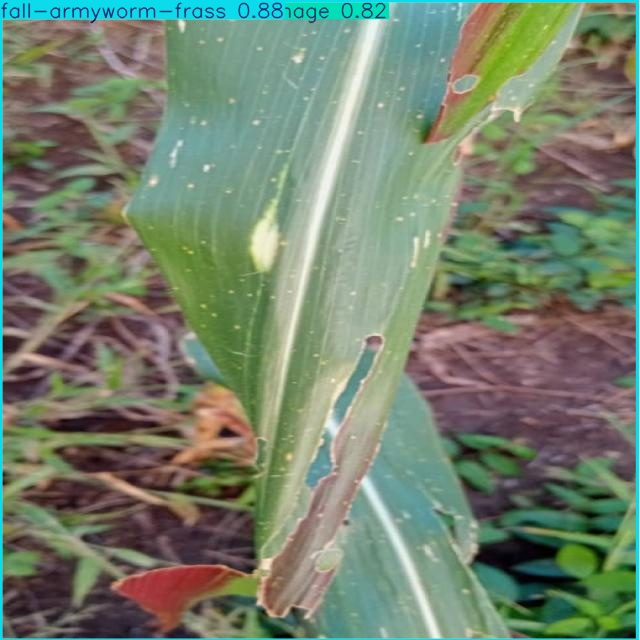

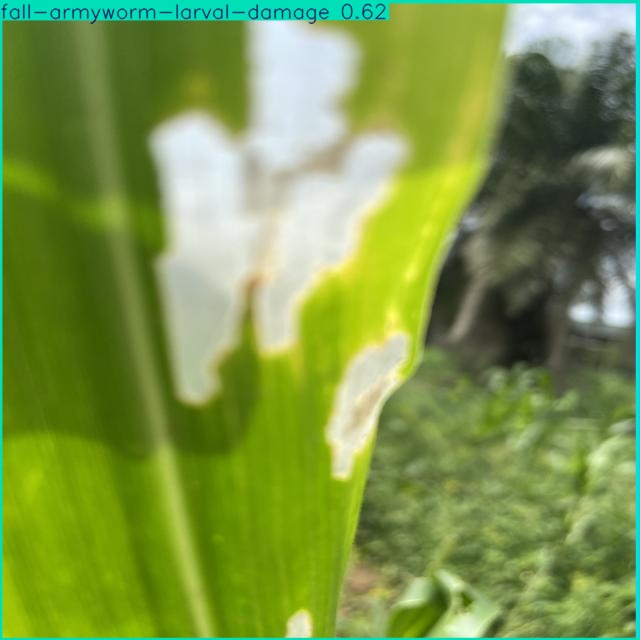

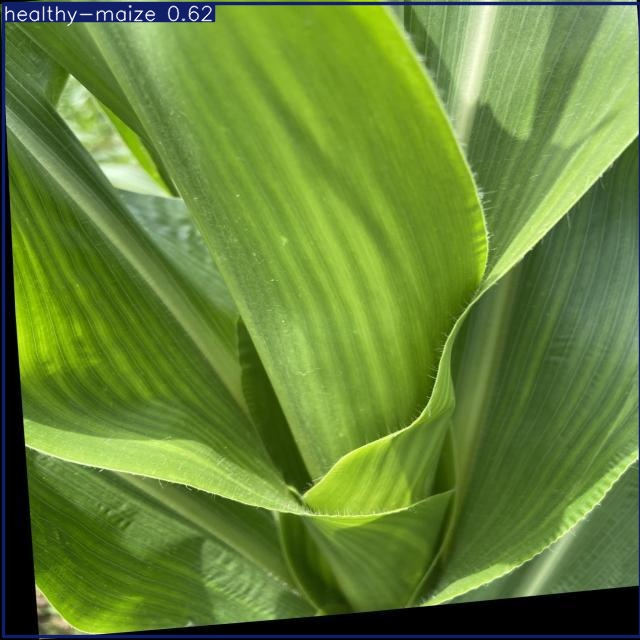

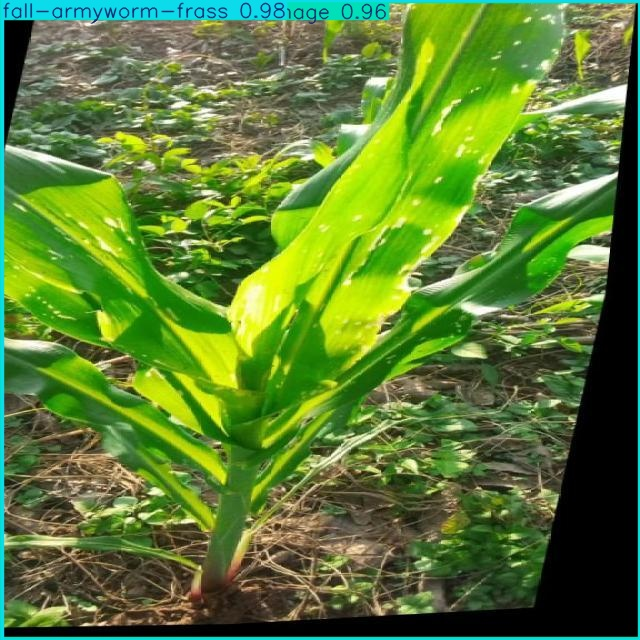

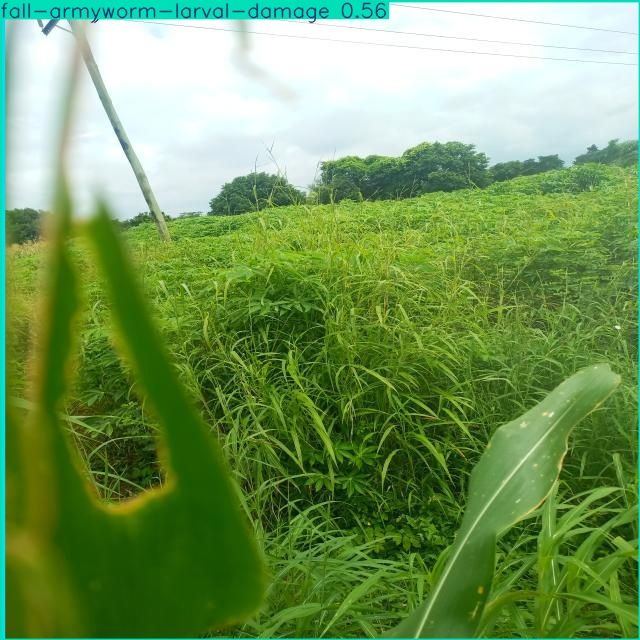

In [ ]:
from IPython.display import Image, display
import glob

# Get test images
test_images = glob.glob(os.path.join(dataset_path, 'test/images/*.jpg'))[:5]

print("🖼️ Sample Predictions:")
for img_path in test_images:
    results = model.predict(img_path, save=True, conf=0.25)

# Display saved predictions
pred_images = glob.glob('runs/detect/predict*/*.jpg')[:5]
for img in pred_images:
    display(Image(filename=img))

**EXPORT TO ONNX FORMAT**

In [ ]:
onnx_path = model.export(format='onnx', simplify=True)

# Copy to Google Drive
import shutil
drive_onnx_path = '/content/drive/MyDrive/faw_model.onnx'
shutil.copy(onnx_path, drive_onnx_path)

print(f"✅ ONNX model exported to: {drive_onnx_path}")

# Also save PyTorch weights
pt_path = '/content/drive/MyDrive/faw_model.pt'
shutil.copy(model.ckpt_path, pt_path)

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/drive/MyDrive/faw_checkpoints/faw_detection9/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 10, 3549) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 189ms
Prepared 6 packages in 9.35s
Installed 6 packages in 250ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.20.0rc1
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.74

requirements: AutoUpdate success ✅ 10.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.20.0rc1 opset 22...
WARNING ⚠️ ONNX: s

'/content/drive/MyDrive/faw_model.pt'

**EVALUATE AND SHOW ACCURACY**

In [ ]:
metrics = model.val(data=os.path.join(dataset_path, 'data.yaml'))

print("\n📊 Evaluation Metrics:")
print(f"  mAP50: {metrics.box.map50:.4f}")
print(f"  mAP50-95: {metrics.box.map:.4f}")
print(f"  Precision: {metrics.box.mp:.4f}")
print(f"  Recall: {metrics.box.mr:.4f}")

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1421.8±555.0 MB/s, size: 62.9 KB)
val: Scanning /content/fall-armyworm-1/valid/labels.cache... 1246 images, 38 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1246/1246 1.1Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 78/78 7.3it/s 10.7s
                   all       1246       2034      0.491      0.675      0.625      0.558
     fall-armyworm-egg         51         85     0.0312     0.0706     0.0272     0.0239
   fall-armyworm-frass        452        469      0.472      0.942      0.732      0.658
   fall-armyworm-larva        192        192      0.208      0.984      0.687      0.595
fall-armyworm-larval-damage        714        824      0.663      0.841       0.78      0.697
         healthy-maize        439        443      0.842      0.819      0.884      0.795
  maize-streak-disease 

**RESUME TRAINING (IF DISCONNECTED)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install ultralytics # Re-install ultralytics in case of session restart
from ultralytics import YOLO

# Load the last checkpoint
checkpoint_dir = '/content/drive/MyDrive/faw_checkpoints'
last_checkpoint = f"{checkpoint_dir}/faw_detection/weights/last.pt"

model = YOLO(last_checkpoint)

# Continue training
results = model.train(
    data=os.path.join(dataset_path, 'data.yaml'),
    epochs=50,  # Total epochs (it will continue from where it stopped)
    resume=True,  # Important: resume from checkpoint
    project=checkpoint_dir,
    name='faw_detection'
)

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/faw_checkpoints/faw_detection/weights/last.pt'

# TEST MODEL

**TEST WITH ONNX**

📋 Classes: ['fall-armyworm-egg', 'fall-armyworm-frass', 'fall-armyworm-larva', 'fall-armyworm-larval-damage', 'healthy-maize', 'maize-streak-disease']
📤 Upload an image to test:


Saving id_6bwlupp14guv7.jpg to id_6bwlupp14guv7.jpg

🔄 Processing...
📊 Output shape: (1, 10, 3549)

🔍 Threshold 0.25: 3 detections

✅ Found 3 detections:
  - fall-armyworm-larva: 52.65%
  - fall-armyworm-frass: 61.26%
  - fall-armyworm-larval-damage: 66.61%


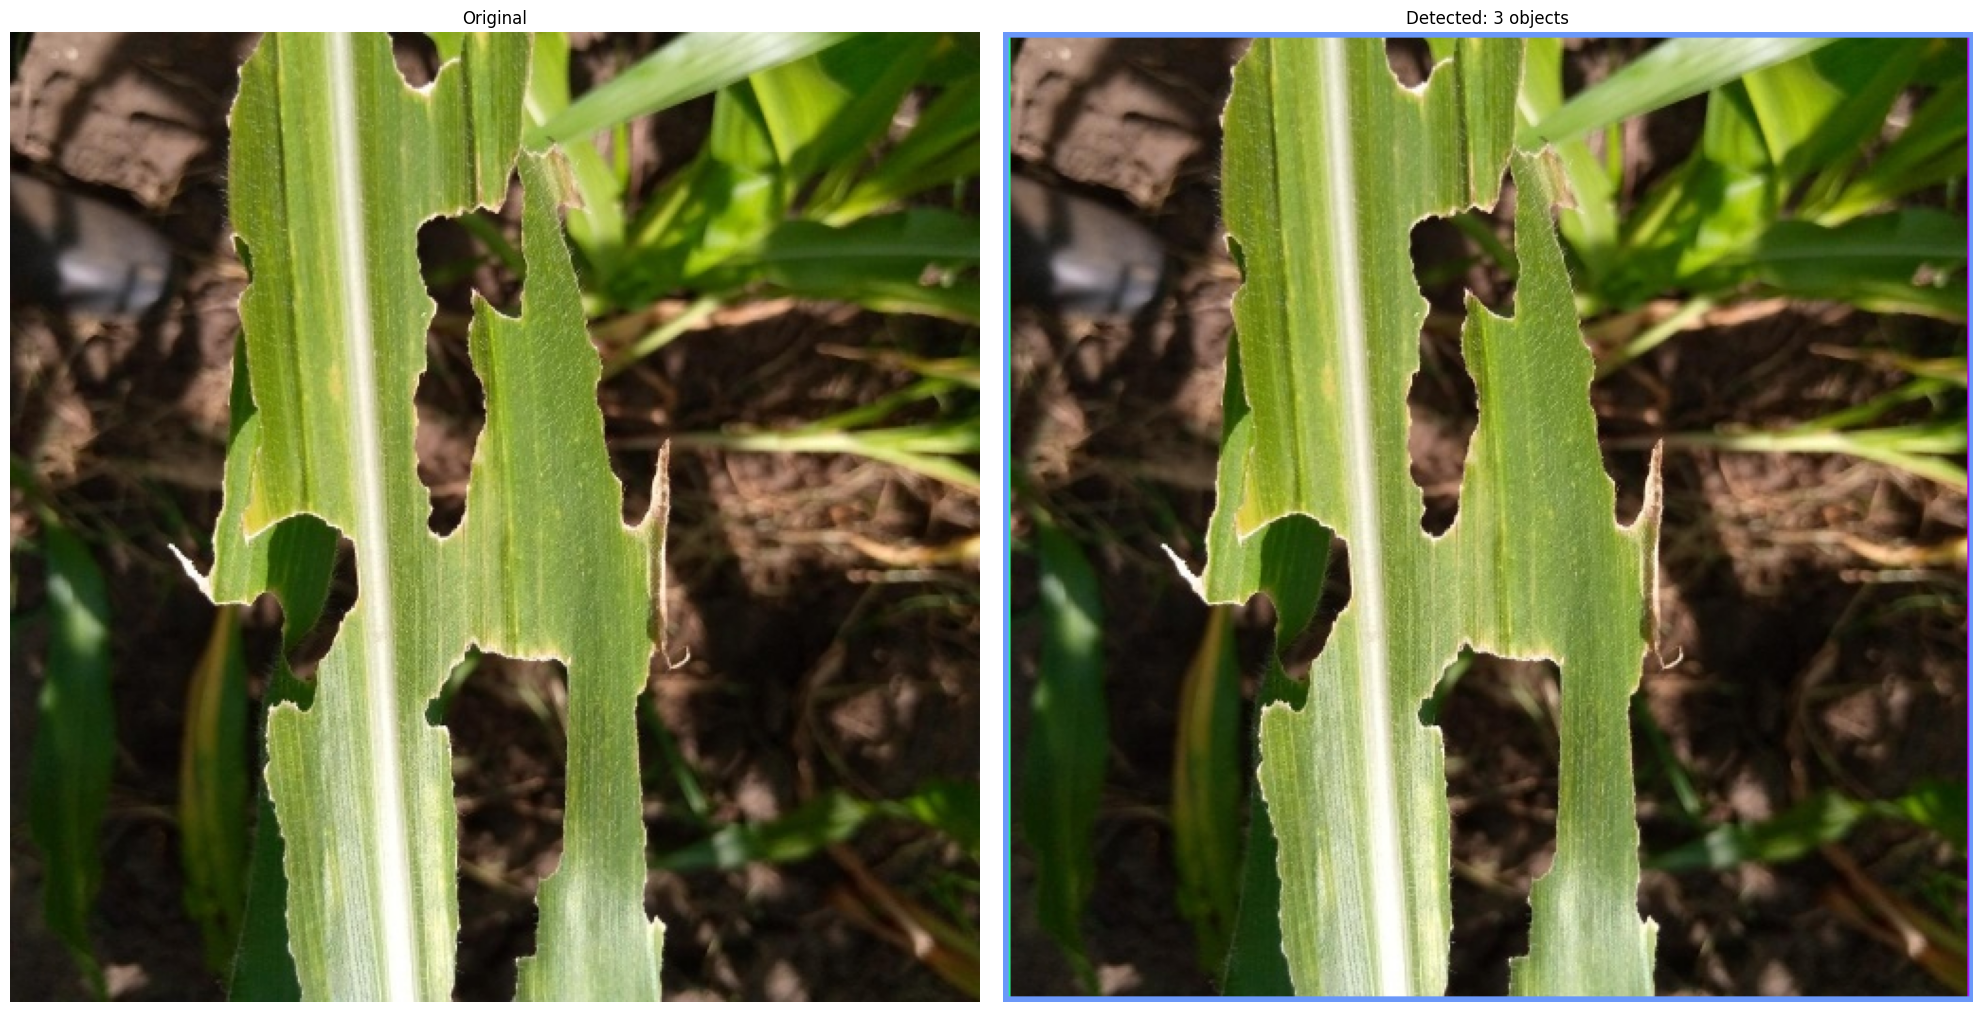

In [ ]:
import cv2
import numpy as np
import onnxruntime as ort
from google.colab import files
import matplotlib.pyplot as plt

# Load ONNX model
session = ort.InferenceSession(drive_onnx_path, providers=['CPUExecutionProvider'])

# Get class names
with open(os.path.join(dataset_path, "data.yaml"), 'r') as f:
    class_names = yaml.safe_load(f)['names']

print(f"📋 Classes: {class_names}")

def preprocess_image(img_path, img_size=416):
    """Preprocess image for YOLO ONNX inference"""
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    orig_h, orig_w = img_rgb.shape[:2]
    scale = min(img_size/orig_h, img_size/orig_w)
    new_h, new_w = int(orig_h * scale), int(orig_w * scale)
    img_resized = cv2.resize(img_rgb, (new_w, new_h))

    # Add padding
    canvas = np.full((img_size, img_size, 3), 114, dtype=np.uint8)
    top = (img_size - new_h) // 2
    left = (img_size - new_w) // 2
    canvas[top:top+new_h, left:left+new_w] = img_resized

    # Normalize and transpose
    img_normalized = canvas.astype(np.float32) / 255.0
    img_transposed = np.transpose(img_normalized, (2, 0, 1))
    img_batch = np.expand_dims(img_transposed, axis=0)

    return img_batch, img_rgb, (top, left, scale, orig_h, orig_w)

def postprocess_detections(output, conf_threshold=0.25, iou_threshold=0.45):
    """
    ✅ CORRECT post-processing for output shape [1, 10, 3549]
    Format: [1, (4 bbox + 6 classes), 3549 predictions]
    """
    predictions = output[0]  # Shape: [1, 10, 3549]
    predictions = predictions[0]  # Shape: [10, 3549]

    # Transpose to [3549, 10]
    predictions = predictions.T  # Now [3549, 10]

    boxes = []
    num_predictions = predictions.shape[0]

    for i in range(num_predictions):
        row = predictions[i]

        # First 4 values: [x_center, y_center, width, height]
        x_center, y_center, width, height = row[0:4]

        # Remaining 6 values: class scores
        class_scores = row[4:]

        # Get max class confidence
        class_id = np.argmax(class_scores)
        confidence = class_scores[class_id]

        if confidence > conf_threshold:
            # Convert to corner format
            x1 = float(x_center - width / 2)
            y1 = float(y_center - height / 2)
            x2 = float(x_center + width / 2)
            y2 = float(y_center + height / 2)

            boxes.append({
                'bbox': [x1, y1, x2, y2],
                'class_id': int(class_id),
                'confidence': float(confidence)
            })

    # Apply NMS
    if len(boxes) > 0:
        boxes = apply_nms(boxes, iou_threshold)

    return boxes

def apply_nms(boxes, iou_threshold):
    """Non-Maximum Suppression"""
    if len(boxes) == 0:
        return []

    # Group by class
    class_boxes = {}
    for box in boxes:
        cls = box['class_id']
        if cls not in class_boxes:
            class_boxes[cls] = []
        class_boxes[cls].append(box)

    # Apply NMS per class
    final_boxes = []
    for cls, cls_boxes in class_boxes.items():
        cls_boxes = sorted(cls_boxes, key=lambda x: x['confidence'], reverse=True)

        keep = []
        while len(cls_boxes) > 0:
            keep.append(cls_boxes[0])
            if len(cls_boxes) == 1:
                break
            cls_boxes = [box for box in cls_boxes[1:]
                        if calculate_iou(keep[-1]['bbox'], box['bbox']) < iou_threshold]

        final_boxes.extend(keep)

    return final_boxes

def calculate_iou(box1, box2):
    """Calculate Intersection over Union"""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area1 + area2 - intersection

    return intersection / union if union > 0 else 0

def draw_boxes(img, boxes, class_names, scale_info):
    """Draw bounding boxes"""
    img_draw = img.copy()
    top, left, scale, orig_h, orig_w = scale_info

    for box in boxes:
        x1, y1, x2, y2 = box['bbox']

        # Scale back to original
        x1 = int((x1 - left) / scale)
        y1 = int((y1 - top) / scale)
        x2 = int((x2 - left) / scale)
        y2 = int((y2 - top) / scale)

        # Clip
        x1 = max(0, min(x1, orig_w))
        y1 = max(0, min(y1, orig_h))
        x2 = max(0, min(x2, orig_w))
        y2 = max(0, min(y2, orig_h))

        # Draw
        np.random.seed(box['class_id'])
        color = tuple(map(int, np.random.randint(0, 255, 3)))

        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 3)

        label = f"{class_names[box['class_id']]}: {box['confidence']:.2%}"
        (text_w, text_h), baseline = cv2.getTextSize(
            label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2
        )
        cv2.rectangle(img_draw, (x1, y1 - text_h - baseline - 5),
                     (x1 + text_w, y1), color, -1)
        cv2.putText(img_draw, label, (x1, y1 - baseline - 5),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    return img_draw

# TEST
print("📤 Upload an image to test:")
uploaded = files.upload()
test_image = list(uploaded.keys())[0]

print("\n🔄 Processing...")
img_batch, original_img, scale_info = preprocess_image(test_image)

# Run inference
inputs = {session.get_inputs()[0].name: img_batch}
outputs = session.run(None, inputs)

print(f"📊 Output shape: {outputs[0].shape}")

# Try multiple thresholds
thresholds = [0.25, 0.15, 0.05]
detections = []

for threshold in thresholds:
    detections = postprocess_detections(outputs, conf_threshold=threshold)
    print(f"\n🔍 Threshold {threshold}: {len(detections)} detections")
    if len(detections) > 0:
        break

# Print results
if len(detections) > 0:
    print(f"\n✅ Found {len(detections)} detections:")
    for det in detections:
        cls_name = class_names[det['class_id']]
        conf = det['confidence']
        print(f"  - {cls_name}: {conf:.2%}")

    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].imshow(original_img)
    axes[0].set_title("Original")
    axes[0].axis('off')

    result_img = draw_boxes(original_img, detections, class_names, scale_info)
    axes[1].imshow(result_img)
    axes[1].set_title(f"Detected: {len(detections)} objects")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("\n❌ NO DETECTIONS at any threshold!")
    print("\n🔍 Debugging info:")

    # Analyze raw predictions
    predictions = outputs[0][0].T
    all_confidences = []
    for row in predictions:
        class_scores = row[4:]
        all_confidences.append(np.max(class_scores))

    all_confidences = np.array(all_confidences)
    print(f"  Max confidence: {all_confidences.max():.4f}")
    print(f"  Mean confidence: {all_confidences.mean():.4f}")
    print(f"  Predictions > 0.05: {(all_confidences > 0.05).sum()}")

    if all_confidences.max() < 0.05:
        print("\n⚠️ Model confidence is extremely low!")
        print("Possible reasons:")
        print("  1. Model needs MORE training (try 50+ epochs)")
        print("  2. Images don't contain Fall Armyworm")
        print("  3. Model architecture issue")
        print("\n💡 Suggestion: Test with PyTorch model instead:")
        print("    from ultralytics import YOLO")
        print("    model = YOLO('/content/drive/MyDrive/faw_model.pt')")
        print("    results = model.predict(test_image, conf=0.05)")

    # Show image anyway
    plt.figure(figsize=(10, 8))
    plt.imshow(original_img)
    plt.title("No Detections Found")
    plt.axis('off')
    plt.show()

#REPORT GENERATION

**GENERATE REPORT**

In [ ]:
report = {
    'Project': 'Fall Armyworm Object Detection',
    'Model': 'YOLOv8 Nano',
    'Dataset': {
        'Classes': class_names,
        'Training Images': len(glob.glob(f"{dataset_path}/train/images/*.jpg")),
        'Validation Images': len(glob.glob(f"{dataset_path}/valid/images/*.jpg")),
        'Test Images': len(glob.glob(f"{dataset_path}/test/images/*.jpg"))
    },
    'Final Metrics': {
        'mAP50': float(metrics.box.map50),
        'mAP50-95': float(metrics.box.map),
        'Precision': float(metrics.box.mp),
        'Recall': float(metrics.box.mr)
    },
    'Model Size': f"{os.path.getsize(drive_onnx_path) / 1024 / 1024:.2f} MB",
    'Export Format': 'ONNX'
}

with open(f"{checkpoint_dir}/project_report.json", 'w') as f:
    json.dump(report, f, indent=2)

print("\n📄 Project Report:")
print(json.dumps(report, indent=2))



📄 Project Report:
{
  "Project": "Fall Armyworm Object Detection",
  "Model": "YOLOv8 Nano",
  "Dataset": {
    "Classes": [
      "fall-armyworm-egg",
      "fall-armyworm-frass",
      "fall-armyworm-larva",
      "fall-armyworm-larval-damage",
      "healthy-maize",
      "maize-streak-disease"
    ],
    "Training Images": 7317,
    "Validation Images": 1246,
    "Test Images": 1271
  },
  "Final Metrics": {
    "mAP50": 0.6254769676617612,
    "mAP50-95": 0.557736603448629,
    "Precision": 0.49138193484934,
    "Recall": 0.6745720728510931
  },
  "Model Size": "11.58 MB",
  "Export Format": "ONNX"
}
